In [ ]:
# https://omegaml.github.io/omegaml/guide/getstarted.html#starting-omega-ml-locally

# !wget https://raw.githubusercontent.com/omegaml/omegaml/master/docker-compose.yml
# !docker-compose up -d

In [1]:
import omegaml as om

In [2]:
om.models.list()

['classifier_50000', 'classifier_om', 'classifier_skl']

In [3]:
om.datasets.list()

['flatten_digits',
 'flatten_image',
 'flatten_test',
 'np_input',
 'stream-classifier_om',
 'stream-classifier_skl',
 'targets',
 'train_images']

In [134]:
import matplotlib.pyplot as plt

# Import the mnist dataset
# https://github.com/datapythonista/mnist
import mnist

# Import classifiers and performance metrics
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import random

## Load the data

In [14]:
# The mnist dataset originally 28x18
images = mnist.train_images()
images.shape

(60000, 28, 28)

In [ ]:
_, axes = plt.subplots(2, 6)
images_and_labels = list(zip(mnist.train_images(), mnist.train_labels()))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:6]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [ ]:
mnist.train_labels()[:6]

In [15]:
# Flattening the images
full_data = images.reshape((images.shape[0], -1))
full_data.shape

(60000, 784)

In [16]:
# I use only part of the dataset
row_number = 50000

In [17]:
assert row_number<= min(full_data.shape[0], mnist.train_labels().shape[0]), 'The number of rows wanted is greater than the size of the full dataset.'

# data
data = full_data[:row_number, :]
data = data/255 # Normalising. https://aigeekprogrammer.com/keras-python-mnist-handwritten-digit-recognition/

# train_labels
full_train_labels = mnist.train_labels()
train_labels = full_train_labels[:row_number]

In [18]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, train_labels, test_size=0.2, shuffle=False)

In [20]:
X_test.shape

(10000, 784)

In [ ]:
om.datasets.put(X_train, 'flatten_digits')
om.datasets.put(y_train, 'targets')

In [ ]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

## Train a model

In [79]:
# Create a classifier: a support vector classifier
classifier_new = svm.SVC(gamma=0.001)

In [81]:
classifier_new.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
# Publishing the model
om.models.put(classifier_new, 'classifier_new')

<Metadata: Metadata(name=classifier_new,bucket=omegaml,prefix=models/,kind=sklearn.joblib,created=2020-11-24 16:18:22.454000)>

In [147]:
om.models.revisions('classifier_new')

[('8b4c328d2a08520442de7aefe76bf157a70285d3', ''),
 ('a44fac815fc5da0ce5191d555771f5a342ce570a', ''),
 ('7aa465df04346205cac718e235a2e76c55bd1596', ''),
 ('8ac120a89d6e7cb1b50d3b3dece5384cd1de2563', ''),
 ('a02768f86e7432464cff507242e6c47f2b15f971', ''),
 ('1390e2f6de9dde791a62e12f148ae0961b44a08e', ''),
 ('a98ae7758e7092ab99489d7837c2bc84a0308665', ''),
 ('876c14c6aff8198719b80dccffe23f7b2991dcb5', ['latest'])]

In [ ]:
# Retrieving a model
classifier_new_test = om.models.get('classifier_new')
classifier_new_test

## Testing on a single instance

In [ ]:
full_test = test_images.reshape((test_images.shape[0], -1))
full_test.shape

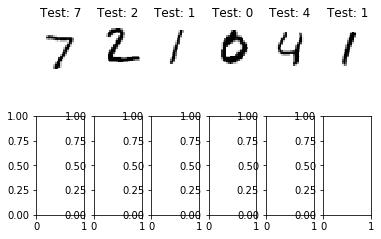

In [75]:
_, axes = plt.subplots(2, 6)
images_and_labels = list(zip(test_images, test_labels))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:6]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Test: %i' % label)

Instance from the mnist.test_images() on row 8488
Expected: 1
Predicted: 1


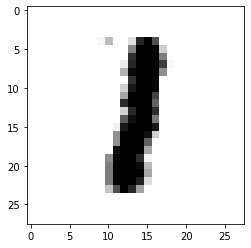

In [150]:
n = random.randint(0,full_test.shape[0])
test_image = test_images[n]

flatten_test = test_image.reshape(1, -1)/255 # Do not forget to normalize !
predicted = classifier_new_test.predict(flatten_test)

plt.imshow(test_image, cmap=plt.cm.gray_r, interpolation='nearest')
print('Instance from the mnist.test_images() on row %i' %n)
print('Expected: %i' % test_labels[n])
print('Predicted: %i' % predicted)

## Model metrics

In [123]:
predicted_all = classifier_new_test.predict(X_test)

In [131]:
predicted_all.shape

(10000,)

In [146]:
predicted_all[2968]

1

In [ ]:
y_test[2968]

In [132]:
y_test.shape

(10000,)

In [130]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier_new_test, metrics.classification_report(y_test, predicted)))

ValueError: Found input variables with inconsistent numbers of samples: [10000, 1]

In [135]:
disp = metrics.plot_confusion_matrix(classifier_new_test, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'